In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


1. csv 파일 읽어오기
2. info, desc
3. datetime 필드 -> 년, 월, 일, 시간
4. casual, registered 제거
5. x의 피처별 count의 관계를 막대그래프로 시각화
6. 데이터 분리
7. 모델 설정 : LinearRegression()
8. 훈련, predict,
9. matric 보기(rmse, rmsle)
* 주요 infortance값 시각화(coef_)
-------------------------------------------------------------
10. feature들을 one-hot encoding
11. RandomForestRegressor, GradientBoostingRegressor
XGBRegressor,LGBMRegressor 알고리즘 적용

In [2]:
df = pd.read_csv(r'data\bike_train.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [3]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [88]:
df['year'] = pd.to_datetime(df.datetime).dt.year
df['month'] = pd.to_datetime(df.datetime).dt.month
df['day'] = pd.to_datetime(df.datetime).dt.day
df['hour'] = pd.to_datetime(df.datetime).dt.hour
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


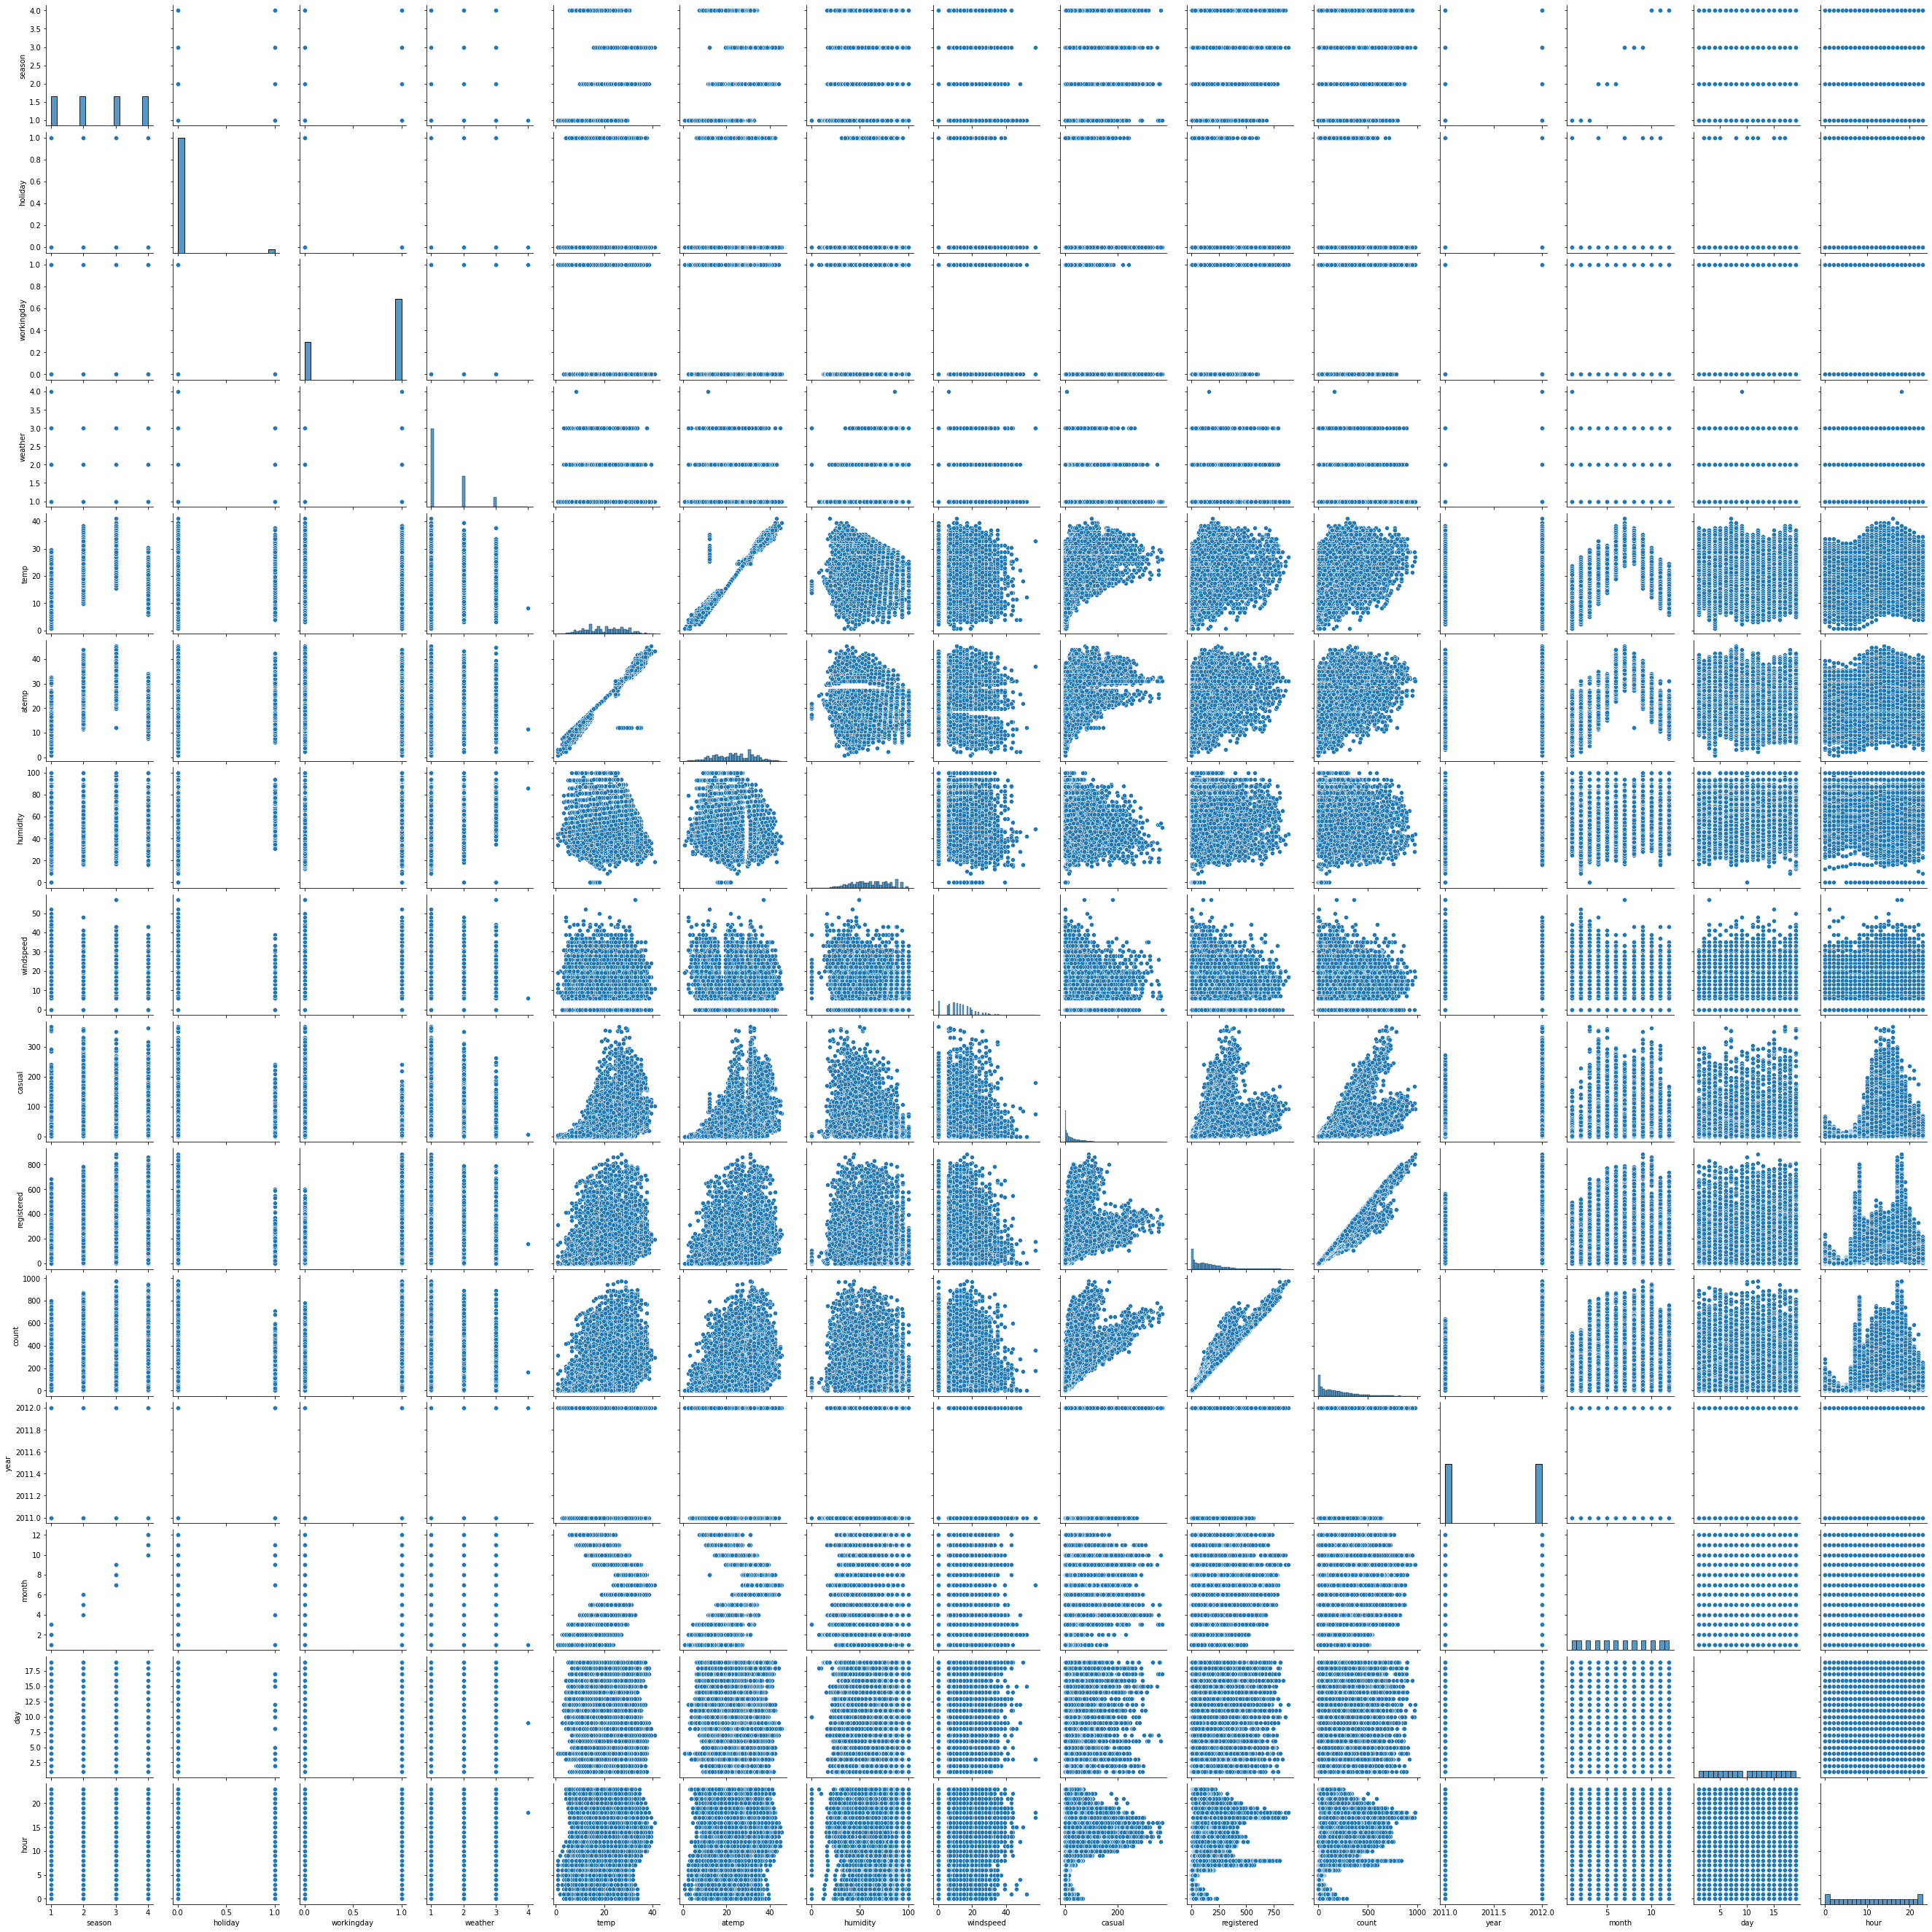

In [89]:
sns.pairplot(df)

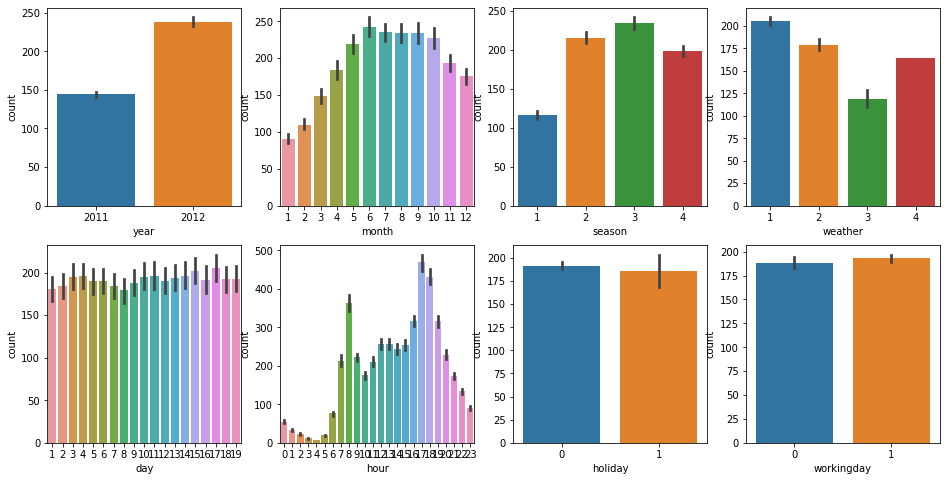

In [90]:
fig, axs = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
cat_features=['year', 'month', 'season', 'weather', 'day', 'hour', 'holiday', 'workingday']
# cat_features에 있는 모든 칼럼별로 개별 칼럼값에 따른 count의 합을 barplot으로 시각화
for i, feature in enumerate(cat_features):
    row = int(i/4)
    col = i%4
    #시본의 barplot을 이용해 칼럼값에 따른 count의 합을 표현
    sns.barplot(x=feature, y='count', data=df, ax=axs[row][col])

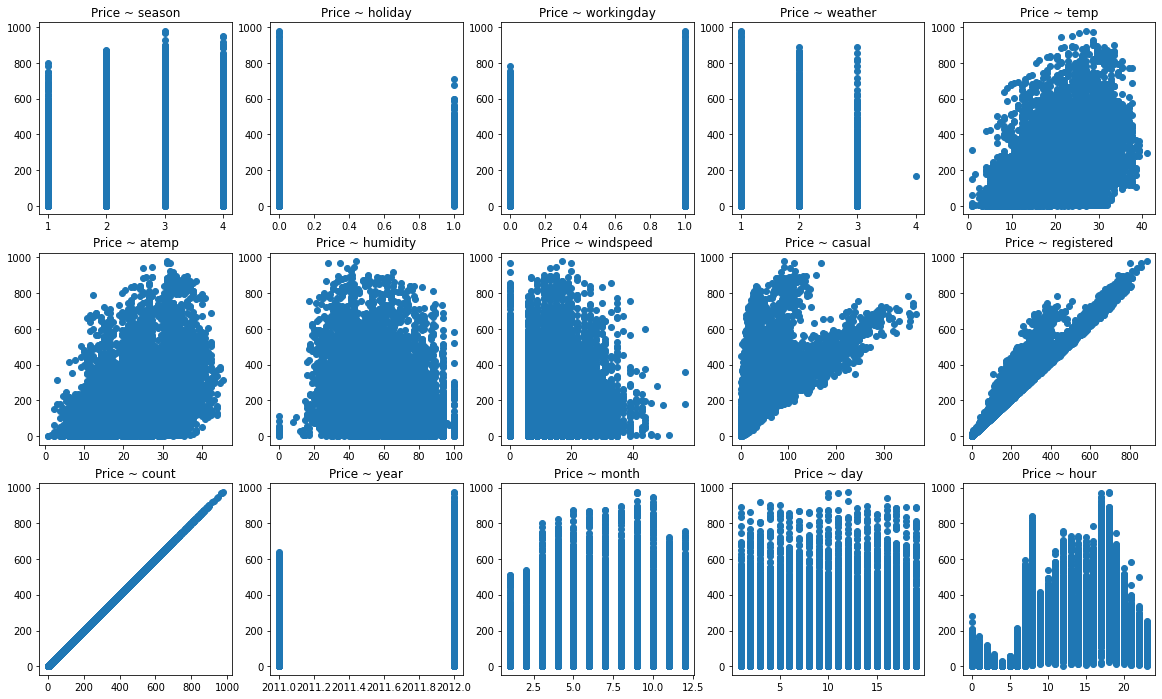

In [95]:
plt.figure(figsize=(4*5, 4*3))
num = 1
for col in df.columns[df.dtypes != 'object']:
    plt.subplot(3, 5, num)
    plt.scatter(df[col], df['count'])
    plt.title(f'Price ~ {col}')
    num += 1
plt.show()

In [96]:
df.corr()['count'].drop('count').sort_values(ascending=False)

registered    0.970948
casual        0.690414
hour          0.400601
temp          0.394454
atemp         0.389784
year          0.260403
month         0.166862
season        0.163439
windspeed     0.101369
day           0.019826
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

In [97]:
df_data = df[df.columns.drop(['datetime', 'casual', 'registered','count'])]
df_target = df['count']

In [98]:
df_target

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [99]:
df_data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0000,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0000,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0000,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.0027,2012,12,19,19
10882,4,0,1,1,14.76,17.425,57,15.0013,2012,12,19,20
10883,4,0,1,1,13.94,15.910,61,15.0013,2012,12,19,21
10884,4,0,1,1,13.94,17.425,61,6.0032,2012,12,19,22


In [100]:
df_target

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_data, df_target, random_state=2022, test_size=0.2
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8708, 12), (2178, 12), (8708,), (2178,))

In [102]:
from sklearn.linear_model import LinearRegression
lr1 = LinearRegression().fit(X_train, y_train)
lr1.score(X_test, y_test)

0.3705819488560894

In [103]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,lr1.predict(X_test))

20086.110061742624

In [104]:
from statsmodels.formula.api import ols

form1 = 'count~' + '+'.join(df_data.columns)
lr2 = ols(form1, df).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.389
Method:                 Least Squares   F-statistic:                     577.6
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:10:30   Log-Likelihood:                -69361.
No. Observations:               10886   AIC:                         1.387e+05
Df Residuals:                   10873   BIC:                         1.388e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.664e+05   5498.669    -30.270      0.000   -1.77e+05   -1.56e+05
season        -7.7368      5.176     -1.495      0.135     -17.883       2.410
holiday       -5.9599      8.483     -0.703      0.482     -22.587      10.668
workingday     0.1730      3.014      0.057      0.954      -5.736       6.082
weather       -4.8891      2.396     -2.041      0.041      -9.585      -0.193
temp           1.6476      1.039      1.586      0.113      -0.388       3.684
atemp          4.6743      0.956      4.890      0.000       2.801       6.548
humidity      -2.0378      0.088    -23.195      0.000      -2.210      -1.866
windspeed      0.6049      0.182      3.316      0.001       0.247       0.963
year          82.7624      2.733     30.278      0.000      77.404      88.120
month          9.9334      1.682      5.905      0.000       6.636      13.231
day            0.3779      0.248      1.523      0.128      -0.109       0.864
hour           7.7781      0.208     37.383      0.000       7.370       8.186
==============================================================================
Omnibus:                     2084.839   Durbin-Watson:                   0.560
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3960.440
Skew:                           1.180   Prob(JB):                         0.00
Kurtosis:                       4.778   Cond. No.                     8.15e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
lr2.pvalues[lr2.pvalues <= 0.05] .index

Index(['Intercept', 'weather', 'atemp', 'humidity', 'windspeed', 'year',
       'month', 'hour'],
      dtype='object')

In [106]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [107]:
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

In [108]:
df.workingday.value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [109]:
df.holiday.value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [110]:
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

In [111]:
df .columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [112]:
c_col = ['season', 'holiday', 'workingday', 'weather']

In [113]:
not_c = df.columns.drop(c_col).drop(['count', 'datetime', 'casual', 'registered'])

In [114]:
c_col_C = list(map(lambda x : 'C(' + x + ')', c_col))
c_col_C

['C(season)', 'C(holiday)', 'C(workingday)', 'C(weather)']

In [115]:
form1 = 'count~' + '+'.join(c_col_C) + '+' + '+'.join(not_c)
lr3 = ols(form1, df).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     447.8
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:10:43   Log-Likelihood:                -69289.
No. Observations:               10886   AIC:                         1.386e+05
Df Residuals:                   10869   BIC:                         1.387e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -1.63e+05   5482.171    -29.725      0.000   -1.74e+05   -1.52e+05
C(season)[T.2]        -2.0918      6.885     -0.304      0.761     -15.588      11.404
C(season)[T.3]       -50.3246     11.570     -4.350      0.000     -73.003     -27.646
C(season)[T.4]       -12.2653     15.475     -0.793      0.428     -42.599      18.069
C(holiday)[T.1]       -6.0431      8.434     -0.717      0.474     -22.575      10.489
C(workingday)[T.1]    -0.5650      2.998     -0.188      0.851      -6.441       5.311
C(weather)[T.2]        6.5446      3.291      1.988      0.047       0.093      12.996
C(weather)[T.3]      -29.3588      5.560     -5.281      0.000     -40.257     -18.461
C(weather)[T.4]       63.0287    140.836      0.448      0.655    -213.036     339.094
temp                   5.3018      1.103      4.807      0.000       3.140       7.464
atemp                  2.6386      0.967      2.729      0.006       0.744       4.534
humidity              -1.9329      0.088    -21.852      0.000      -2.106      -1.760
windspeed              0.5127      0.182      2.815      0.005       0.156       0.870
year                  81.0123      2.725     29.726      0.000      75.670      86.354
month                  9.1801      1.675      5.482      0.000       5.898      12.463
day                    0.3182      0.247      1.290      0.197      -0.165       0.802
hour                   7.6674      0.209     36.689      0.000       7.258       8.077
==============================================================================
Omnibus:                     2121.134   Durbin-Watson:                   0.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4086.316
Skew:                           1.192   Prob(JB):                         0.00
Kurtosis:                       4.824   Cond. No.                     8.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
lr_pv = lr3.pvalues.drop('Intercept')
lr_pv[lr_pv <= 0.05].index

Index(['C(season)[T.3]', 'C(weather)[T.2]', 'C(weather)[T.3]', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'hour'],
      dtype='object')

In [117]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [118]:
c_col_dt = c_col + ['year', 'month', 'day', 'hour']
c_col_dt

['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'hour']

In [119]:
not_c_dt = df.columns.drop(c_col_dt).drop(['count', 'datetime', 'casual', 'registered'])

In [120]:
df_dum = df[not_c_dt]
for col in c_col_dt:
    df_dum = pd.concat([df_dum, pd.get_dummies(df[col], prefix=col)], axis=1)
df_dum

,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,holiday_0,holiday_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,9.84,14.395,81,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,9.02,13.635,80,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,9.84,14.395,75,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.84,14.395,75,0.0000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,0,0,0,1,1,0,...,0,0,0,0,0,1,0,0,0,0
10882,14.76,17.425,57,15.0013,0,0,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0
10883,13.94,15.910,61,15.0013,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
10884,13.94,17.425,61,6.0032,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


In [177]:
X_train, X_test, y_train, y_test = train_test_split(
    df_dum, df['count'], random_state=2022, test_size=0.3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7620, 73), (7620,), (3266, 73), (3266,))

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
df_dum_sc = scaler.fit_transform(df_dum)

In [123]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(
    df_dum_sc, df['count'], random_state=2022, test_size=0.3
)

X_train_sc.shape, y_train_sc.shape, X_test_sc.shape, y_test_sc.shape

((7620, 73), (7620,), (3266, 73), (3266,))

In [124]:
lr2 = LinearRegression().fit(X_train, y_train)
lr2.score(X_test, y_test)

0.6859598160645182

In [125]:
from sklearn.ensemble import RandomForestRegressor
rft = RandomForestRegressor().fit(X_train,y_train)
rft.score(X_test, y_test)

0.9166412488898843

<AxesSubplot:>

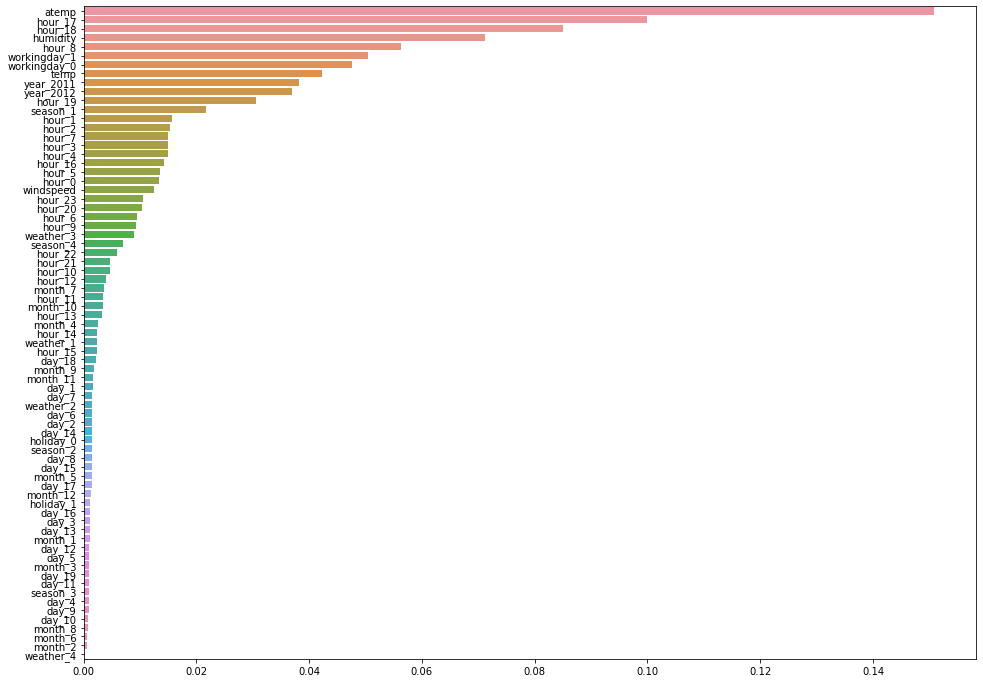

In [127]:
feature_imp = pd.Series(rft.feature_importances_, index=X_train.columns)
feature_imp = feature_imp.sort_values(ascending=False)
plt.figure(figsize=(16, 12))
sns.barplot(x=feature_imp.values, y = feature_imp.index)

0.9161961263084928


<AxesSubplot:>

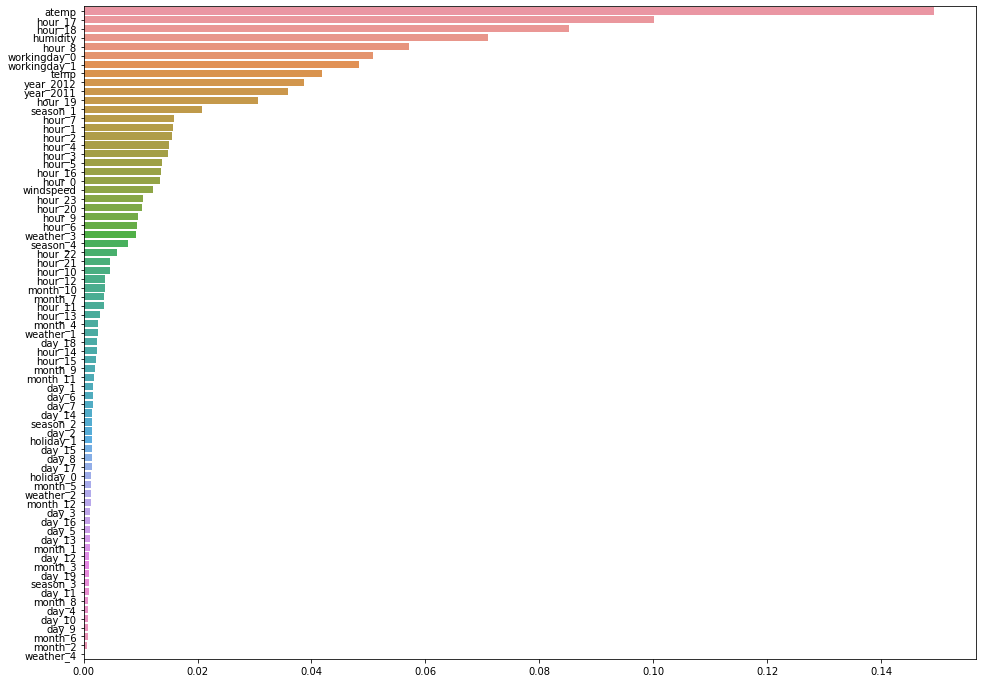

In [129]:
from sklearn.ensemble import RandomForestRegressor
rft4 = RandomForestRegressor().fit(X_train_sc,y_train_sc)
print(rft4.score(X_test_sc, y_test_sc))
plt.figure(figsize=(16, 12))
feature_imp = pd.Series(rft4.feature_importances_, index=X_train.columns)
feature_imp = feature_imp.sort_values(ascending=False)
sns.barplot(x=feature_imp.values, y = feature_imp.index)

In [130]:
df2 = df.copy()
df2

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22


In [190]:
df2_dum = pd.DataFrame()
for col in c_col :
    df2_dum = pd.concat([df2_dum , pd.get_dummies(df[col], prefix=col)], axis=1)
df2_dum

,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,1,0,0,0,1,0,1,0,1,0,0,0
1,1,0,0,0,1,0,1,0,1,0,0,0
2,1,0,0,0,1,0,1,0,1,0,0,0
3,1,0,0,0,1,0,1,0,1,0,0,0
4,1,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,0,0,1,1,0,0,1,1,0,0,0
10882,0,0,0,1,1,0,0,1,1,0,0,0
10883,0,0,0,1,1,0,0,1,1,0,0,0
10884,0,0,0,1,1,0,0,1,1,0,0,0


In [191]:
df2_dum = pd.concat([df[not_c], df2_dum], axis=1)
df2_dum

,temp,atemp,humidity,windspeed,year,month,day,hour,season_1,season_2,season_3,season_4,holiday_0,holiday_1,workingday_0,workingday_1,weather_1,weather_2,weather_3,weather_4
0,9.84,14.395,81,0.0000,2011,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0
1,9.02,13.635,80,0.0000,2011,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
2,9.02,13.635,80,0.0000,2011,1,1,2,1,0,0,0,1,0,1,0,1,0,0,0
3,9.84,14.395,75,0.0000,2011,1,1,3,1,0,0,0,1,0,1,0,1,0,0,0
4,9.84,14.395,75,0.0000,2011,1,1,4,1,0,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,15.58,19.695,50,26.0027,2012,12,19,19,0,0,0,1,1,0,0,1,1,0,0,0
10882,14.76,17.425,57,15.0013,2012,12,19,20,0,0,0,1,1,0,0,1,1,0,0,0
10883,13.94,15.910,61,15.0013,2012,12,19,21,0,0,0,1,1,0,0,1,1,0,0,0
10884,13.94,17.425,61,6.0032,2012,12,19,22,0,0,0,1,1,0,0,1,1,0,0,0


In [192]:
X_train, X_test, y_train, y_test = train_test_split(
    df2_dum , df['count'], random_state=2022
)
X_train.shape, y_train.shape

((8164, 20), (8164,))

In [193]:
rft3 = RandomForestRegressor().fit(X_train, y_train)
rft3.score(X_test,y_test)

0.9416515595358916

In [194]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(y_test,rft3.predict(X_test))
mse , np.sqrt(mse)

(1846.3118495958859, 42.96873106802068)

In [195]:
from xgboost import XGBRegressor
xgb = XGBRegressor().fit(X_train, y_train)
xgb.score(X_test, y_test)

0.9490597515516666

In [196]:
X_train.shape

(8164, 20)

In [198]:
mse_xg = mean_squared_error(y_test, xgb.predict(X_test))
mse_xg, np.sqrt(mse_xg)

(1611.8954265687705, 40.14841748523558)

In [140]:
from xgboost import XGBRegressor
xgb3 = XGBRegressor().fit(X_train_sc, y_train_sc)
xgb3.score(X_test_sc, y_test_sc)

0.9281853489781006

In [199]:
df_ols = df_dum.copy()
df_ols['count'] = df['count']
form1 = 'count~' + '+'.join(df_ols.columns.drop('count'))
lr5 = ols(form1, df_ols).fit()
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     396.8
Date:                Tue, 18 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:20:13   Log-Likelihood:                -65592.
No. Observations:               10886   AIC:                         1.313e+05
Df Residuals:                   10823   BIC:                         1.318e+05
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       27.4023      8.407      3.259      0.001      10.923      43.882
temp             2.1013      0.850      2.472      0.013       0.435       3.768
atemp            2.4585      0.708      3.470      0.001       1.070       3.847
humidity        -0.8141      0.070    -11.577      0.000      -0.952      -0.676
windspeed       -0.5190      0.132     -3.925      0.000      -0.778      -0.260
season_1       -26.1967      2.693     -9.727      0.000     -31.476     -20.917
season_2        15.3810      2.629      5.850      0.000      10.227      20.535
season_3        10.0999      3.433      2.942      0.003       3.370      16.830
season_4        28.1181      2.470     11.383      0.000      23.276      32.960
holiday_0       17.6121      4.901      3.594      0.000       8.006      27.218
holiday_1        9.7902      5.493      1.782      0.075      -0.977      20.557
workingday_0    12.7088      4.329      2.936      0.003       4.223      21.194
workingday_1    14.6935      4.348      3.379      0.001       6.171      23.216
weather_1       70.5802     23.254      3.035      0.002      24.998     116.162
weather_2       59.8612     23.264      2.573      0.010      14.259     105.463
weather_3        3.9432     23.372      0.169      0.866     -41.871      49.757
weather_4     -106.9823     77.513     -1.380      0.168    -258.922      44.957
year_2011      -30.2162      4.316     -7.001      0.000     -38.677     -21.756
year_2012       57.6185      4.317     13.348      0.000      49.157      66.080
month_1        -23.3649      3.113     -7.506      0.000     -29.467     -17.263
month_2        -10.3439      2.932     -3.528      0.000     -16.091      -4.596
month_3          7.5120      2.932      2.562      0.010       1.764      13.260
month_4         -9.5295      3.010     -3.166      0.002     -15.430      -3.629
month_5         17.1753      2.908      5.907      0.000      11.476      22.875
month_6          7.7352      3.287      2.353      0.019       1.291      14.179
month_7        -12.9312      3.166     -4.085      0.000     -19.137      -6.726
month_8         -1.5642      3.079     -0.508      0.611      -7.599       4.470
month_9         24.5954      2.897      8.491      0.000      18.917      30.273
month_10        22.6061      3.088      7.320      0.000      16.553      28.660
month_11         5.3452      2.894      1.847      0.065      -0.327      11.018
month_12         0.1667      3.016      0.055      0.956      -5.744       6.078
day_1           -7.9185      4.125     -1.920      0.055     -16.004       0.167
day_2           -2.9367      4.112     -0.714      0.475     -10.997       5.123
day_3            1.8178      4.109      0.442      0.658      -6.236       9.871
day_4            3.3833      4.121      0.821      0.412      -4.694      11.461
day_5

In [200]:
valid_index = lr5.pvalues[lr5.pvalues <= 0.05].drop('Intercept').index

In [201]:
valid_index

Index(['temp', 'atemp', 'humidity', 'windspeed', 'season_1', 'season_2',
       'season_3', 'season_4', 'holiday_0', 'workingday_0', 'workingday_1',
       'weather_1', 'weather_2', 'year_2011', 'year_2012', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_9', 'month_10', 'day_17', 'hour_0', 'hour_1', 'hour_2', 'hour_3',
       'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10',
       'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16',
       'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22',
       'hour_23'],
      dtype='object')

In [207]:
X_train, X_test, y_train, y_test = train_test_split(
    df_dum, df['count'], random_state=2022, test_size=0.3
)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7620, 73), (7620,), (3266, 73), (3266,))

In [208]:
xgb = XGBRegressor().fit(X_train[valid_index], y_train)
xgb.score(X_test[valid_index], y_test)

0.9290230747820258

In [209]:
rft2 = RandomForestRegressor().fit(X_train[valid_index], y_train)
rft2.score(X_test[valid_index], y_test)

0.9108924881974234

In [210]:
feature_imp = pd.Series(rft2.feature_importances_, index=valid_index)
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp

atemp           0.149185
hour_17         0.102070
hour_18         0.083717
humidity        0.079106
hour_8          0.057420
workingday_1    0.053198
workingday_0    0.048816
temp            0.046496
year_2011       0.038306
year_2012       0.037443
hour_19         0.030949
season_1        0.020617
windspeed       0.016266
hour_7          0.016073
hour_1          0.015411
hour_2          0.015361
hour_3          0.014627
hour_4          0.014495
hour_16         0.014108
hour_0          0.013425
hour_5          0.013148
hour_20         0.010801
hour_23         0.010473
hour_9          0.010006
hour_6          0.009242
season_4        0.009089
hour_22         0.006254
hour_21         0.005298
weather_1       0.005199
hour_10         0.004976
hour_12         0.004623
month_7         0.003975
month_10        0.003969
hour_11         0.003781
weather_2       0.003633
hour_13         0.003308
month_4         0.003048
hour_14         0.002925
holiday_0       0.002815
month_9         0.002633


<AxesSubplot:>

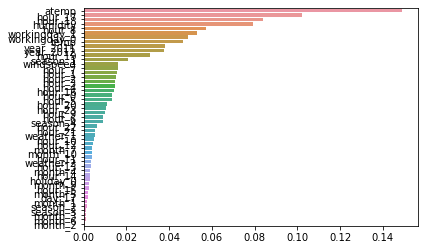

In [211]:
sns.barplot(x=feature_imp.values, y = feature_imp.index)

In [212]:
lr6 = LinearRegression().fit(X_train[valid_index], y_train)
lr6.score(X_test[valid_index], y_test)

0.6858734609864158

In [213]:
X_train.shape

(7620, 73)

In [153]:
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Embedding
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [214]:
X_train, X_test, y_train, y_test = train_test_split(
    df2_dum , df['count'], random_state=2022
)
X_train.shape, y_train.shape

((8164, 20), (8164,))

In [215]:
del model

In [216]:
model = Sequential([
    Embedding(49, 64),
    LSTM(128, return_sequences=True, activation='relu'),
    GRU(256, return_sequences=True, activation='relu'),
    GRU(512, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          3136      
                                                                 
 lstm_9 (LSTM)               (None, None, 128)         98816     
                                                                 
 gru_14 (GRU)                (None, None, 256)         296448    
                                                                 
 gru_15 (GRU)                (None, 512)               1182720   
                                                                 
 dense_21 (Dense)            (None, 128)               65664     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 1)                

In [217]:
model.compile('adam', 'mean_squared_error')

In [218]:
model_path = 'bike_best.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [219]:
import tensorflow as tf
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3227769089066732797
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2254123828
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6539659443589982037
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [220]:
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

Physical devices cannot be modified after being initialized


In [221]:
hist1 = model.fit(X_train, y_train, validation_split=0.2,
                epochs=1000, batch_size=64,
                callbacks = [mc, es])

Epoch 1/1000
103/103 [==============================] - ETA: 0s - loss: 47272.3867
Epoch 1: val_loss improved from inf to 25264.78320, saving model to bike_best.h5
103/103 [==============================] - 32s 258ms/step - loss: 47272.3867 - val_loss: 25264.7832
Epoch 2/1000
103/103 [==============================] - ETA: 0s - loss: 26078.7578
Epoch 2: val_loss did not improve from 25264.78320
103/103 [==============================] - 26s 257ms/step - loss: 26078.7578 - val_loss: 25545.5996
Epoch 3/1000
103/103 [==============================] - ETA: 0s - loss: 23586.7129
Epoch 3: val_loss improved from 25264.78320 to 24340.02734, saving model to bike_best.h5
103/103 [==============================] - 25s 244ms/step - loss: 23586.7129 - val_loss: 24340.0273
Epoch 4/1000
103/103 [==============================] - ETA: 0s - loss: 23227.7305
Epoch 4: val_loss improved from 24340.02734 to 22198.76758, saving model to bike_best.h5
103/103 [==============================] - 28s 270ms/step 

In [224]:
best_model = load_model(model_path)
bm_mse = best_model.evaluate(X_test, y_test)
bm_mse , np.sqrt(best_model.evaluate(X_test, y_test))

86/86 [==============================] - 3s 39ms/step - loss: 6230.8252


(6230.8251953125, 78.93557623348613)